# Import Libraries

In [18]:
import pandas as pd
import numpy as np
from catboost import CatBoostClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
import os
import pickle
os.chdir(f'C:\\Users\\Khangjrakpam Arjun\\OneDrive - McKinsey & Company\\Documents\\ARJUN\\ML\\COMPETITIONS\\Amex\\amex-default-prediction\\data')

In [3]:
os.chdir(f'C:\\Users\\Khangjrakpam Arjun\\OneDrive - McKinsey & Company\\Documents\\ARJUN\\ML\\COMPETITIONS\\Amex\\amex-default-prediction\\preprocessed_data')

Aggregated data are shared in dataset: https://www.kaggle.com/datasets/huseyincot/amex-agg-data-pickle
Data created with following code: https://www.kaggle.com/code/huseyincot/amex-agg-data-how-it-created

In [4]:
train = pd.read_pickle("train_agg_imputed_with_median.pkl")
test = pd.read_pickle("test_agg_imputed_with_median.pkl")

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 458913 entries, 0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a to fffff1d38b785cef84adeace64f8f83db3a0c31e8d92eaba8b115f71cab04681
Columns: 1048 entries, B_10_mean to target
dtypes: float64(993), int64(55)
memory usage: 3.6+ GB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 924621 entries, 00000469ba478561f23a92a868bd366de6f6527a684c9a2e78fb826dcac3b9b7 to fffffa7cf7e453e1acc6a1426475d5cb9400859f82ff61cceb803ea8ec37634d
Columns: 1047 entries, B_10_mean to D_64_nunique
dtypes: float64(993), int64(54)
memory usage: 7.2+ GB


In [7]:
train.head()

,B_10_mean,B_10_std,B_10_min,B_10_max,B_10_last,B_10_median,B_11_mean,B_11_std,B_11_min,B_11_max,...,D_126_count,D_126_last,D_126_nunique,D_63_count,D_63_last,D_63_nunique,D_64_count,D_64_last,D_64_nunique,target
customer_ID,,,,,,,,,,,,,,,,,,,,,
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a,0.316065,NaN,0.316065,0.316065,0.316065,0.316065,0.008733,NaN,0.008733,0.008733,...,1,2.0,1,1,0.0,1,1,0.0,1,0
00000fd6641609c6ece5454664794f0340ad84dddce9a267a310b5ae68e9d8e5,0.299325,NaN,0.299325,0.299325,0.299325,0.299325,0.008047,NaN,0.008047,0.008047,...,1,2.0,1,1,3.0,1,1,0.0,1,0
00001b22f846c82c51f6e3958ccd81970162bae8b007e80662ef27519fcc18c1,0.300219,NaN,0.300219,0.300219,0.300219,0.300219,0.005092,NaN,0.005092,0.005092,...,1,2.0,1,1,3.0,1,1,2.0,1,0
000041bdba6ecadd89a52d11886e8eaaec9325906c9723355abb5ca523658edc,0.302809,NaN,0.302809,0.302809,0.302809,0.302809,0.011032,NaN,0.011032,0.011032,...,1,2.0,1,1,3.0,1,1,0.0,1,0
00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8ad51ca8b8c4a24cefed,0.058786,NaN,0.058786,0.058786,0.058786,0.058786,0.004283,NaN,0.004283,0.004283,...,1,2.0,1,1,3.0,1,1,0.0,1,0


# Competition Metric

In [8]:
def amex_metric(y_true: pd.DataFrame, y_pred: pd.DataFrame) -> float:
    def top_four_percent_captured(y_true: pd.DataFrame, y_pred: pd.DataFrame) -> float:
        df = (pd.concat([y_true, y_pred], axis='columns')
              .sort_values('prediction', ascending=False))
        df['weight'] = df['target'].apply(lambda x: 20 if x == 0 else 1)
        four_pct_cutoff = int(0.04 * df['weight'].sum())
        df['weight_cumsum'] = df['weight'].cumsum()
        df_cutoff = df.loc[df['weight_cumsum'] <= four_pct_cutoff]
        return (df_cutoff['target'] == 1).sum() / (df['target'] == 1).sum()

    def weighted_gini(y_true: pd.DataFrame, y_pred: pd.DataFrame) -> float:
        df = (pd.concat([y_true, y_pred], axis='columns')
              .sort_values('prediction', ascending=False))
        df['weight'] = df['target'].apply(lambda x: 20 if x == 0 else 1)
        df['random'] = (df['weight'] / df['weight'].sum()).cumsum()
        total_pos = (df['target'] * df['weight']).sum()
        df['cum_pos_found'] = (df['target'] * df['weight']).cumsum()
        df['lorentz'] = df['cum_pos_found'] / total_pos
        df['gini'] = (df['lorentz'] - df['random']) * df['weight']
        return df['gini'].sum()

    def normalized_weighted_gini(y_true: pd.DataFrame, y_pred: pd.DataFrame) -> float:
        y_true_pred = y_true.rename(columns={'target': 'prediction'})
        return weighted_gini(y_true, y_pred) / weighted_gini(y_true, y_true_pred)

    g = normalized_weighted_gini(y_true, y_pred)
    d = top_four_percent_captured(y_true, y_pred)

    return 0.5 * (g + d)

In [9]:
features = test.columns.to_list()
cat_features = [
    "B_30",
    "B_38",
    "D_114",
    "D_116",
    "D_117",
    "D_120",
    "D_126",
    "D_63",
    "D_64",
    "D_66",
    "D_68"
]
cat_features = [f"{cf}_last" for cf in cat_features]
le_encoder = LabelEncoder()
for categorical_feature in cat_features:
    train[categorical_feature] = le_encoder.fit_transform(train[categorical_feature])
    test[categorical_feature] = le_encoder.transform(test[categorical_feature])

In [10]:
train_y = pd.DataFrame(train["target"])
train_x = train.drop("target", axis=1)

# Model Training

In [11]:
N_FOLDS = 5
skf = StratifiedKFold(n_splits=N_FOLDS, shuffle=True, random_state=22)
y_oof = np.zeros(train_x.shape[0])
y_test = np.zeros(test.shape[0])
ix = 0
for train_ind, val_ind in skf.split(train_x, train_y):
    print(f"******* Fold {ix} ******* ")
    tr_x, val_x = (
        train_x.iloc[train_ind].reset_index(drop=True),
        train_x.iloc[val_ind].reset_index(drop=True),
    )
    tr_y, val_y = (
        train_y.iloc[train_ind].reset_index(drop=True),
        train_y.iloc[val_ind].reset_index(drop=True),
    )

    clf = CatBoostClassifier(iterations=5000, random_state=22)
    clf.fit(tr_x, tr_y, eval_set=[(val_x, val_y)], cat_features=cat_features,  verbose=100)
    preds = clf.predict_proba(val_x)[:, 1]
    y_oof[val_ind] = y_oof[val_ind] + preds

    preds_test = clf.predict_proba(test)[:, 1]
    y_test = y_test + preds_test / N_FOLDS
    ix = ix + 1
y_pred = train_y.copy(deep=True)
y_pred = y_pred.rename(columns={"target": "prediction"})
y_pred["prediction"] = y_oof
val_score = amex_metric(train_y, y_pred)
print(f"Amex metric: {val_score}")

******* Fold 0 ******* 
Learning rate set to 0.067666
0:	learn: 0.6209897	test: 0.6212152	best: 0.6212152 (0)	total: 994ms	remaining: 1h 22m 48s
100:	learn: 0.2611098	test: 0.2652317	best: 0.2652317 (100)	total: 1m 19s	remaining: 1h 4m 18s
200:	learn: 0.2532704	test: 0.2589426	best: 0.2589426 (200)	total: 2m 51s	remaining: 1h 8m 16s
300:	learn: 0.2484907	test: 0.2562826	best: 0.2562826 (300)	total: 4m 24s	remaining: 1h 8m 54s
400:	learn: 0.2448763	test: 0.2547749	best: 0.2547749 (400)	total: 5m 51s	remaining: 1h 7m 8s
500:	learn: 0.2418526	test: 0.2538879	best: 0.2538879 (500)	total: 7m 19s	remaining: 1h 5m 47s
600:	learn: 0.2390670	test: 0.2531563	best: 0.2531563 (600)	total: 8m 43s	remaining: 1h 3m 52s
700:	learn: 0.2366491	test: 0.2526489	best: 0.2526489 (700)	total: 10m 13s	remaining: 1h 2m 40s
800:	learn: 0.2345773	test: 0.2523082	best: 0.2523082 (800)	total: 11m 42s	remaining: 1h 1m 23s
900:	learn: 0.2323756	test: 0.2520292	best: 0.2520235 (895)	total: 13m 5s	remaining: 59m 31s
1

3300:	learn: 0.1946392	test: 0.2465503	best: 0.2465503 (3300)	total: 44m 23s	remaining: 22m 50s
3400:	learn: 0.1933202	test: 0.2465330	best: 0.2464957 (3376)	total: 45m 41s	remaining: 21m 28s
3500:	learn: 0.1919299	test: 0.2465335	best: 0.2464957 (3376)	total: 46m 59s	remaining: 20m 7s
3600:	learn: 0.1906649	test: 0.2465229	best: 0.2464957 (3376)	total: 48m 20s	remaining: 18m 46s
3700:	learn: 0.1893871	test: 0.2464854	best: 0.2464817 (3696)	total: 49m 37s	remaining: 17m 25s
3800:	learn: 0.1881194	test: 0.2465036	best: 0.2464762 (3735)	total: 50m 57s	remaining: 16m 4s
3900:	learn: 0.1867794	test: 0.2465520	best: 0.2464762 (3735)	total: 52m 14s	remaining: 14m 42s
4000:	learn: 0.1855941	test: 0.2465836	best: 0.2464762 (3735)	total: 53m 31s	remaining: 13m 21s
4100:	learn: 0.1843562	test: 0.2465884	best: 0.2464762 (3735)	total: 54m 48s	remaining: 12m
4200:	learn: 0.1831575	test: 0.2466124	best: 0.2464762 (3735)	total: 56m 4s	remaining: 10m 39s
4300:	learn: 0.1819140	test: 0.2466300	best: 0.

1400:	learn: 0.2233905	test: 0.2486865	best: 0.2486692 (1391)	total: 26m 55s	remaining: 1h 9m 12s
1500:	learn: 0.2216178	test: 0.2486217	best: 0.2486193 (1496)	total: 31m 53s	remaining: 1h 14m 22s
1600:	learn: 0.2198299	test: 0.2485680	best: 0.2485664 (1576)	total: 32m 54s	remaining: 1h 9m 54s
1700:	learn: 0.2181324	test: 0.2484841	best: 0.2484841 (1700)	total: 33m 50s	remaining: 1h 5m 40s
1800:	learn: 0.2164111	test: 0.2484314	best: 0.2484294 (1798)	total: 34m 51s	remaining: 1h 1m 56s
1900:	learn: 0.2147543	test: 0.2484117	best: 0.2483903 (1840)	total: 35m 56s	remaining: 58m 36s
2000:	learn: 0.2131608	test: 0.2483963	best: 0.2483820 (1958)	total: 37m 4s	remaining: 55m 35s
2100:	learn: 0.2116037	test: 0.2484247	best: 0.2483820 (1958)	total: 38m 25s	remaining: 53m 2s
2200:	learn: 0.2099393	test: 0.2484734	best: 0.2483820 (1958)	total: 39m 49s	remaining: 50m 39s
2300:	learn: 0.2083731	test: 0.2485273	best: 0.2483820 (1958)	total: 41m 12s	remaining: 48m 21s
2400:	learn: 0.2067842	test: 0.

4700:	learn: 0.1764297	test: 0.2474213	best: 0.2467466 (2800)	total: 1h 32m 49s	remaining: 5m 54s
4800:	learn: 0.1753760	test: 0.2474256	best: 0.2467466 (2800)	total: 1h 33m 59s	remaining: 3m 53s
4900:	learn: 0.1741896	test: 0.2474974	best: 0.2467466 (2800)	total: 1h 35m 11s	remaining: 1m 55s
4999:	learn: 0.1730368	test: 0.2475548	best: 0.2467466 (2800)	total: 1h 36m 24s	remaining: 0us

bestTest = 0.2467465648
bestIteration = 2800

Shrink model to first 2801 iterations.
Amex metric: 0.7394852267604255


In [12]:
y_oof_binary = (y_oof >= np.percentile(y_oof, 96)).astype(int)

In [13]:
y_oof_binary.mean()

0.040001045949885926

# Plot Confusion Matrix

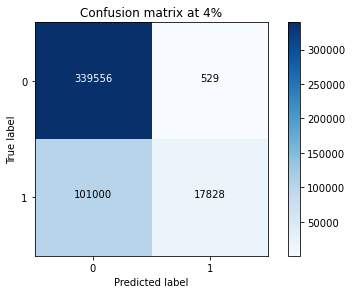

In [14]:
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title = 'Confusion matrix"',
                          cmap = plt.cm.Blues) :
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])) :
        plt.text(j, i, cm[i, j],
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
cm = confusion_matrix(train_y, y_oof_binary)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm,
                      classes = class_names,
                      title = f'Confusion matrix at 4%')
plt.show()

# Submission

In [15]:
test["prediction"] = y_test
test["prediction"].to_csv(f"submission_cat_{val_score}.csv", index=True)

In [16]:
os.getcwd()

'C:\\Users\\Khangjrakpam Arjun\\OneDrive - McKinsey & Company\\Documents\\ARJUN\\ML\\COMPETITIONS\\Amex\\amex-default-prediction\\preprocessed_data'

### Save model to disk

In [33]:
# save the model to disk
from datetime import datetime
current_time = datetime.now().strftime("%H_%M_%S")
filename = r'C:\Users\Khangjrakpam Arjun\OneDrive - McKinsey & Company\Documents\ARJUN\ML\COMPETITIONS\Amex\amex-default-prediction\saved_model\catboost'+'\\'+('catboost') +'_model.sav'
print(filename)
import pickle
pickle.dump(clf, open(filename, 'wb'))


C:\Users\Khangjrakpam Arjun\OneDrive - McKinsey & Company\Documents\ARJUN\ML\COMPETITIONS\Amex\amex-default-prediction\saved_model\catboost\catboost_model.sav


### Load model from disk

In [20]:
filename = r'C:\Users\Khangjrakpam Arjun\OneDrive - McKinsey & Company\Documents\ARJUN\ML\COMPETITIONS\Amex\amex-default-prediction\saved_model\catboost'+'\\'+('catboost') +'_model.sav'
print(filename)
import pickle

C:\Users\Khangjrakpam Arjun\OneDrive - McKinsey & Company\Documents\ARJUN\ML\COMPETITIONS\Amex\amex-default-prediction\saved_model\catboost\catboost_model.sav


In [21]:
# load the model from disk
clf = pickle.load(open(filename, 'rb'))
#rfr.score(X_test, y_test)